In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

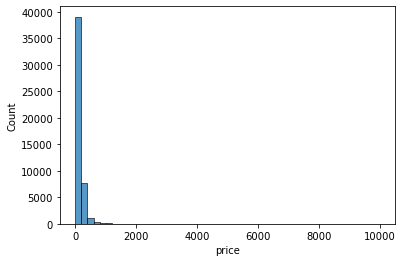

In [11]:
sns.histplot(df.price, bins=50)

In [16]:
cols = list(['latitude', 'longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])
df = df[cols]

<h2><b>Question N° 1 : Number of missing values</b></h2>

In [17]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<h2><b>Question N° 2 : Median for minimum_nights</b></h2>

In [20]:
df['minimum_nights'].mean()

7.029962163820431


    Shuffle the initial dataset, use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Make sure that the target value ('price') is not in your dataframe.
    Apply the log transformation to the price variable using the np.log1p() function.


In [24]:
df_len = len(df)
df_len

48895

In [25]:
nval = int(df_len * 0.2)
ntest = int(df_len * 0.2)
ntrain = df_len - nval - ntest

ntrain, nval, ntest

(29337, 9779, 9779)

In [32]:
df_train = df.iloc[:ntrain]
df_val = df.iloc[ntrain:ntrain + nval]
df_test = df.iloc[ntrain + nval:]

idx = np.arange(df_len)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [61]:
df_train = df.iloc[idx[:ntrain]]
df_val = df.iloc[idx[ntrain:ntrain + nval]]
df_test = df.iloc[idx[ntrain + nval:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)



<AxesSubplot:xlabel='price', ylabel='Count'>

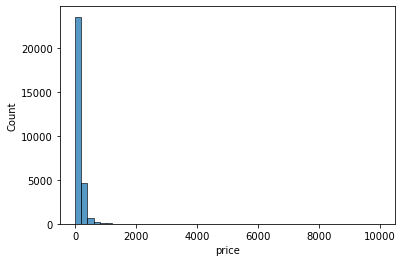

In [62]:
sns.histplot(df_train.price, bins=50)

In [63]:
y_train = np.log1p(df_train['price'].values)
y_val = np.log1p(df_val['price'].values)
y_test = np.log1p(df_test['price'].values)

del df_train['price']
del df_val['price']
del df_test['price']

<AxesSubplot:ylabel='Count'>

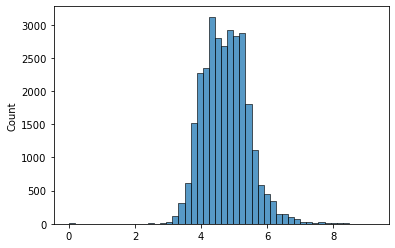

In [64]:
sns.histplot(y_train, bins=50)

<h2><b>Question N° 3</b></h2>

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?


In [65]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [91]:
df_train.reviews_per_month.mean()

1.3685492094777056

In [105]:
def prepare_X_Val0(df):
    df = df.copy()
    
    df = df.fillna(0)
    X = df.values
    return X

def prepare_X_Mean(df):
    df = df.copy()
    
    df = df.fillna(df_train.reviews_per_month.mean())
    X = df.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

<b>reviews_per_month field = 0</b>

In [110]:
X_train = prepare_X_Val0(df_train)
X_val = prepare_X_Val0(df_val)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score.round(2)

0.64

<AxesSubplot:ylabel='Count'>

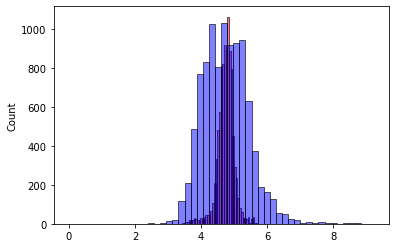

In [107]:
sns.histplot(y_pred, color = 'red', alpha = 0.5,  bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

<b>reviews_per_month field = Train Field Mean</b>

In [111]:
X_train = prepare_X_Mean(df_train)
X_val = prepare_X_Mean(df_val)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score.round(2)

0.64

<AxesSubplot:ylabel='Count'>

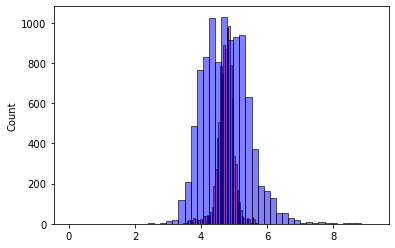

In [109]:
sns.histplot(y_pred, color = 'red', alpha = 0.5,  bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

<h2><b>Question N° 4</b></h2>

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?
    If there are multiple options, select the smallest r.

In [116]:
def prepare_X_Val0(df):
    df = df.copy()
    
    df = df.fillna(0)
    X = df.values
    return X

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [117]:
reg_list = list([0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10])
for r in reg_list:
    X_train = prepare_X_Val0(df_train)
    X_val = prepare_X_Val0(df_val)

    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, score.round(2))

0 0.64
1e-06 0.64
0.0001 0.64
0.001 0.64
0.01 0.66
0.1 0.68
1 0.68
5 0.68
10 0.68


<h2><b>Question N° 5</b></h2>

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

    Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


In [120]:
def prepare_X_Val0(df):
    df = df.copy()
    
    df = df.fillna(0)
    X = df.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [121]:
seed_list = list([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [154]:
scores = []

for seed_value in seed_list:
    idx = np.arange(df_len)
    np.random.seed(seed_value)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:ntrain]]
    df_val = df.iloc[idx[ntrain:ntrain + nval]]
    df_test = df.iloc[idx[ntrain + nval:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train['price'].values)
    y_val = np.log1p(df_val['price'].values)
    y_test = np.log1p(df_test['price'].values)

    del df_train['price']
    del df_val['price']
    del df_test['price']

    X_train = prepare_X_Val0(df_train)
    X_val = prepare_X_Val0(df_val)

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append(score)
    
    print(seed_value, score.round(2), score)

0 0.65 0.6549779961658879
1 0.65 0.6462523685602725
2 0.65 0.6476558177088877
3 0.64 0.6375145070617896
4 0.64 0.6445809083397582
5 0.63 0.6305809996462547
6 0.63 0.6297851915889006
7 0.65 0.6506184266349652
8 0.65 0.6489780353205986
9 0.64 0.6437565167963184


In [152]:
std_score = np.std(scores)

Scores Array

In [156]:
scores

[0.6549779961658879,
 0.6462523685602725,
 0.6476558177088877,
 0.6375145070617896,
 0.6445809083397582,
 0.6305809996462547,
 0.6297851915889006,
 0.6506184266349652,
 0.6489780353205986,
 0.6437565167963184]

In [157]:
round(std_score, 3)

0.008

<h2><b>Question N° 6</b></h2>

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Train a model with r=0.001.
    What's the RMSE on the test dataset?


In [158]:
def prepare_X_Val0(df):
    df = df.copy()
    
    df = df.fillna(0)
    X = df.values
    return X

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [160]:
idx = np.arange(df_len)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:ntrain]]
df_val = df.iloc[idx[ntrain:ntrain + nval]]
df_test = df.iloc[idx[ntrain + nval:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train['price'].values)
y_val = np.log1p(df_val['price'].values)
y_test = np.log1p(df_test['price'].values)

del df_train['price']
del df_val['price']
del df_test['price']


In [161]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.70423,-73.91595,1,3,0.13,1,0
1,40.77115,-73.92275,40,23,0.27,1,207
2,40.70401,-74.00932,29,0,NaN,96,1
3,40.74526,-73.97679,30,1,0.04,23,365
4,40.59349,-73.76377,1,1,0.16,1,90
...,...,...,...,...,...,...,...
39111,40.69440,-73.92420,3,26,2.43,1,3
39112,40.67133,-73.94526,2,8,0.40,1,0
39113,40.72982,-73.98593,2,2,0.11,1,0
39114,40.71969,-73.95620,1,1,0.02,1,0


In [164]:
X_full_train = prepare_X_Val0(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X_Val0(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score.round(2)

0.65